# The Monty Hall Problem:

'The Monty Hall problem is a counter-intuitive statistics puzzle:

* There are 3 doors, behind which are two goats and a car.

* You pick a door (call it door A). You’re hoping for the car of course.

* Monty Hall, the game show host, examines the other doors (B & C) and opens one with a goat. (If both doors have goats, he picks randomly.)

Here’s the game: Do you stick with door A (original guess) or switch to the unopened door? Does it matter?'

https://betterexplained.com/articles/understanding-the-monty-hall-problem/

## The output of the code cell below shows all possible arrangements of the items behind the doors. Then it shows all of the possible outcomes for whichever door you might choose:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this generates a dataframe showing all the possible arragements of items behind the door

possibility_1 = ['goat', 'goat', 'prize']

possibility_2 = ['goat', 'prize', 'goat']

possibility_3 = ['prize', 'goat', 'goat']

df = pd.DataFrame([possibility_1, possibility_2, possibility_3], columns = ['door_1', 'door_2', 'door_3'])

df.index = ['possibility 1:','possibility 2:', 'possibility 3:']
print('\n\nHere are all the possible arrangements of the items behind the doors:')
display(df)

# this generates an output that shows all possible outcomes for all possible choices

doors = np.arange(1,4)

for door in doors:
    
    door_choice = door
    print('\n\n####################################################################################################################\n')
    print('If you chose door number', door, ':\n')

  
    if door_choice == 1:
        door_choice = 'door_1'
    elif door_choice == 2:
        door_choice = 'door_2'
    elif door_choice == 3:
        door_choice = 'door_3'

    for i in np.arange(len(df)): 
        if df[door_choice].iloc[i] == 'goat':
            print('\nIf you chose '+str(door_choice)+', and possibility '+str(i+1)+' was true, you would have won if you had switched, and lost if you had stayed.')
        if df[door_choice].iloc[i] == 'prize':
            print('\nIf you chose '+str(door_choice)+', and possibility '+str(i+1)+' was true, you would have lost if you had switched, and won if you had stayed.')



Here are all the possible arrangements of the items behind the doors:


,door_1,door_2,door_3
possibility 1:,goat,goat,prize
possibility 2:,goat,prize,goat
possibility 3:,prize,goat,goat




####################################################################################################################

If you chose door number 1 :


If you chose door_1, and possibility 1 was true, you would have won if you had switched, and lost if you had stayed.

If you chose door_1, and possibility 2 was true, you would have won if you had switched, and lost if you had stayed.

If you chose door_1, and possibility 3 was true, you would have lost if you had switched, and won if you had stayed.


####################################################################################################################

If you chose door number 2 :


If you chose door_2, and possibility 1 was true, you would have won if you had switched, and lost if you had stayed.

If you chose door_2, and possibility 2 was true, you would have lost if you had switched, and won if you had stayed.

If you chose door_2, and possibility 3 was true, you would have won if you had switched, and lost if you had 

# You can see that for whichever door you choose, it is more likely that you will win the prize if you switch.

### We can also illustrate this through simulation:

On each trial of the simulation, one of the three possible arrangements for the items behind the door is selected:


In [2]:
display(df)

,door_1,door_2,door_3
possibility 1:,goat,goat,prize
possibility 2:,goat,prize,goat
possibility 3:,prize,goat,goat


Then a door is selected at random as the first choice. One remaining door which contains a goat is then opened.

Three strategies are modelled:

1. 'Always switch' - this strategy will always switch from the first choice door to the remaining closed door.

2. 'Never switch' - this strategy will never switch, and will always stick with the first, randomly selected door.

3. 'Randomly switch' - this strategy will perform a virtual coinflip to decide whether to switch.

At the end of the simulation, the percentage of trials which resulted in winning a prize is plotted for each strategy.

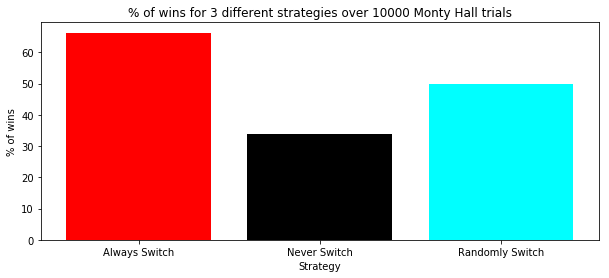

There were 10000 trials.

The "Always Switch" strategy won the prize on 66.28 % of the trials.

The "Never Switch" strategy won the prize on 33.72 % of the trials.

The "Randomly Switch" strategy won the prize on 49.78 % of the trials.



In [3]:
# setting the number of iterations for the simulation
n_iters = 10000

# creating arrays to store the outcomes of three different strategies: always switching, never switching and randomly switching
always_switch_outcomes = np.array([])
never_switch_outcomes = np.array([])
random_switch_outcomes = np.array([])

# running thousands of trials to see which strategy is most effective
for i in np.arange(n_iters):
  
    df = pd.DataFrame([possibility_1, possibility_2, possibility_3], columns = ['door_1', 'door_2', 'door_3'])

    df.index = ['possibility 1:','possibility 2:', 'possibility 3:']
    
    # randomly deciding the arrangement of items behind the doors
    state_of_the_world = df.loc[np.random.choice(df.index)]
    
    # picking a first door at random
    first_choice = np.random.choice(state_of_the_world.index)

    # opening the remaining door which has a goat behind it
    remaining = state_of_the_world.index[state_of_the_world.index != first_choice]

    for r in remaining:

        if state_of_the_world.loc[r] == 'goat':

            state_of_the_world.loc[r] = 'goat (open)'
            break
            
    # choosing to switch or stay based on the three strategies
    not_open = state_of_the_world[state_of_the_world != 'goat (open)']
    
    
    switcher_outcome = not_open.loc[not_open.index[not_open.index !=first_choice][0]]
    stayer_outcome = state_of_the_world.loc[first_choice]
    random_outcome = np.random.choice(state_of_the_world[state_of_the_world != 'goat (open)'])
    
    # recording the outcome for each strategy
    always_switch_outcomes = np.append(always_switch_outcomes,switcher_outcome)
    never_switch_outcomes =  np.append(never_switch_outcomes,stayer_outcome)
    random_switch_outcomes = np.append(random_switch_outcomes,random_outcome)
    
# calculating the proportion of wins for each strategy    
prop_wins_always_switch = np.count_nonzero(always_switch_outcomes == 'prize')/len(always_switch_outcomes)

prop_wins_never_switch = np.count_nonzero(never_switch_outcomes == 'prize')/len(never_switch_outcomes)

prop_wins_random_switch = np.count_nonzero(random_switch_outcomes == 'prize')/len(random_switch_outcomes)

# plotting the outcomes of the simulation
plt.figure(figsize = (10,4))
plt.title('% of wins for 3 different strategies over '+str(n_iters)+' Monty Hall trials')
plt.bar(['Always Switch', 'Never Switch', 'Randomly Switch',], 
        [prop_wins_always_switch*100, prop_wins_never_switch*100, prop_wins_random_switch*100], 
        color = ['red', 'black', 'cyan'])

plt.xlabel('Strategy')
plt.ylabel('% of wins')
plt.show()

print('There were '+str(n_iters)+' trials.\n')
print('The "Always Switch" strategy won the prize on', prop_wins_always_switch*100,'% of the trials.\n') 
print('The "Never Switch" strategy won the prize on', prop_wins_never_switch*100,'% of the trials.\n') 
print('The "Randomly Switch" strategy won the prize on', prop_wins_random_switch*100,'% of the trials.\n') 